# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
data = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/560_bodyfat/560_bodyfat.tsv.gz"
df = pd.read_csv(data, sep="\t")
df_sample = df.sample(n=10)
print(df_sample)

     Density   Age  Weight  Height       Neck       Chest     Abdomen  \
224   1.0740  55.0  179.75   68.75  41.099998  106.900002   95.300003   
72    1.0796  56.0  160.75   73.75  36.400002   93.599998   82.900002   
44    1.0814  39.0  125.25   68.00  31.500000   85.099998   76.000000   
222   1.0726  54.0  161.75   67.50  37.400002   94.199997   87.599998   
11    1.0812  27.0  216.00   76.00  39.400002  103.599998   90.900002   
53    1.0848  49.0  152.75   73.50  35.099998   93.300003   79.599998   
243   1.0256  67.0  227.75   72.75  41.299999  115.800003  113.400002   
84    1.0378  72.0  168.00   69.25  38.500000  101.400002   99.800003   
230   1.0745  57.0  147.75   65.75  35.200001   99.599998   86.400002   
172   1.0521  35.0  177.25   71.00  38.400002  100.500000   90.300003   

            Hip      Thigh       Knee      Ankle     Biceps    Forearm  \
224   98.199997  57.400002  37.099998  21.799999  34.099998  31.100000   
72    96.300003  52.900002  37.500000  23.100000

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [4]:
for col in df_sample.columns:
    print(col)

Density
Age
Weight
Height
Neck
Chest
Abdomen
Hip
Thigh
Knee
Ankle
Biceps
Forearm
Wrist
target


### Column Descriptions
- Density: The measured body density of the individual.
- Age: The person’s age in years.
- Weight: Body weight measured in pounds.
- Height: The individual’s height in inches.
- Neck: Neck circumference measured at the narrowest point, in centimeters.
- Chest: Chest circumference measured at the nipple line, in centimeters.
- Abdomen: Abdominal circumference at the level of the navel, in centimeters. 
- Hip: Hip circumference measured at the widest part, in centimeters.
- Thigh: Thigh circumference measured at the thickest region, in centimeters.
- Knee: Knee circumference measured over the kneecap, in centimeters.
- Ankle: Ankle circumference measured above the ankle bone, in centimeters.
- Biceps: Flexed biceps circumference, in centimeters.
- Forearm: Forearm circumference at the widest point, in centimeters.
- Wrist: Wrist circumference measured at the narrowest point, in centimeters.
- target: The estimated body fat percentage for the individual.


### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [4]:
print(df.shape)
print(df.dtypes)
display(df.head())

(252, 15)
Density    float64
Age        float64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
target     float64
dtype: object


,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
0,1.0708,23.0,154.25,67.75,36.200001,93.099998,85.199997,94.500000,59.000000,37.299999,21.900000,32.000000,27.400000,17.100000,12.300000
1,1.0853,22.0,173.25,72.25,38.500000,93.599998,83.000000,98.699997,58.700001,37.299999,23.400000,30.500000,28.900000,18.200001,6.100000
2,1.0414,22.0,154.00,66.25,34.000000,95.800003,87.900002,99.199997,59.599998,38.900002,24.000000,28.799999,25.200001,16.600000,25.299999
3,1.0751,26.0,184.75,72.25,37.400002,101.800003,86.400002,101.199997,60.099998,37.299999,22.799999,32.400002,29.400000,18.200001,10.400000
4,1.0340,24.0,184.25,71.25,34.400002,97.300003,100.000000,101.900002,63.200001,42.200001,24.000000,32.200001,27.700001,17.700001,28.700001


In [5]:
print(df.isna().sum())

Density    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
target     0
dtype: int64


In [6]:
display(df.describe())

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,44.884921,178.924405,70.148810,37.992064,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,19.150794
std,0.019031,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411804,1.694894,3.021274,2.020691,0.933585,8.368740
min,0.995000,22.000000,118.500000,29.500000,31.100000,79.300003,69.400002,85.000000,47.200001,33.000000,19.100000,24.799999,21.000000,15.800000,0.000000
25%,1.041400,35.750000,159.000000,68.250000,36.400002,94.350000,84.574999,95.500000,56.000000,36.975000,22.000000,30.200001,27.299999,17.600000,12.475000
50%,1.054900,43.000000,176.500000,70.000000,38.000000,99.649998,90.950001,99.300003,59.000000,38.500000,22.799999,32.049999,28.700001,18.299999,19.200001
75%,1.070400,54.000000,197.000000,72.250000,39.425001,105.375002,99.324997,103.525000,62.349999,39.925001,24.000000,34.325000,30.000000,18.799999,25.299999
max,1.108900,81.000000,363.149994,77.750000,51.200001,136.199997,148.100006,147.699997,87.300003,49.099998,33.900002,45.000000,34.900002,21.400000,47.500000


,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
Density,1.000000,-0.277637,-0.594062,0.097881,-0.472967,-0.682599,-0.798955,-0.609332,-0.553091,-0.495041,-0.264890,-0.487109,-0.351648,-0.325716,-0.987782
Age,-0.277637,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531,0.291458
Weight,-0.594062,-0.012746,1.000000,0.308279,0.830716,0.894190,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775,0.612414
Height,0.097881,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065,-0.089495
Neck,-0.472967,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826,0.490592
Chest,-0.682599,0.176450,0.894190,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162,0.702620
Abdomen,-0.798955,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832,0.813432
Hip,-0.609332,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090,0.625201
Thigh,-0.553091,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685,0.559608
Knee,-0.495041,0.017516,0.853167,0.286053,0.672405,0.719496,0.737179,0.823473,0.799170,1.000000,0.611608,0.678709,0.555898,0.664507,0.508665


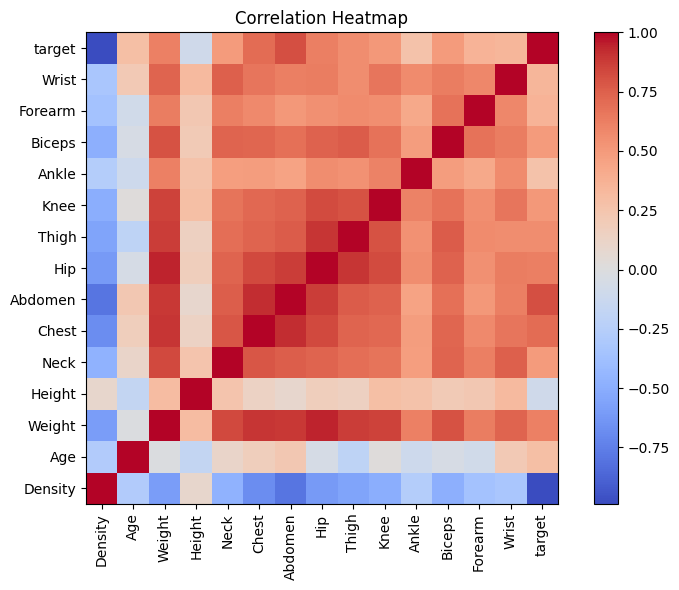

In [11]:
corr = df.corr()
display(corr)

plt.figure(figsize=(8,6))
im = plt.imshow(corr, cmap='coolwarm', origin='lower')
plt.colorbar(im)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

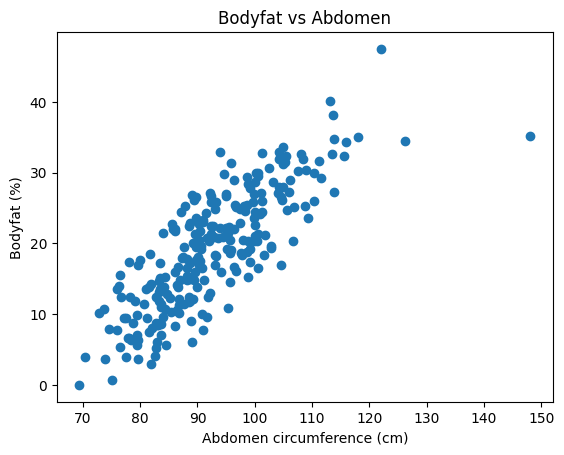

In [ ]:
plt.scatter(df["Abdomen"], df["target"])
plt.xlabel("Abdomen circumference (cm)")
plt.ylabel("Bodyfat (%)")
plt.title("Bodyfat vs Abdomen")
plt.show()

Abdomen circumference shows a very strong positive relationship with bodyfat. The points lie along a clear upward trend, and the spread is narrow. This suggests that abdomen size is the single best individual predictor of bodyfat in the dataset.

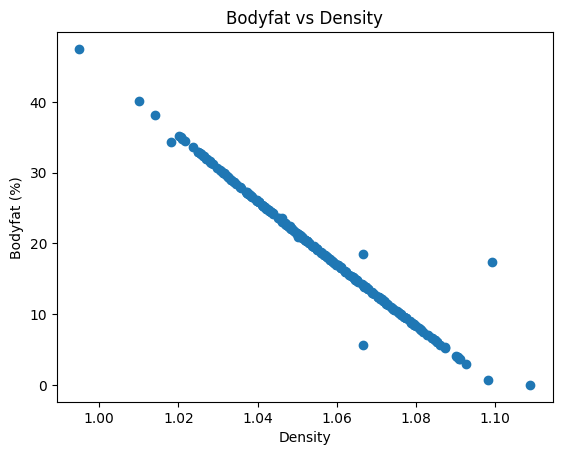

In [12]:
plt.scatter(df["Density"], df["target"])
plt.xlabel("Density")
plt.ylabel("Bodyfat (%)")
plt.title("Bodyfat vs Density")
plt.show()

Density has a very strong negative correlation with bodyfat percentage. People with lower density have higher bodyfat. This matches the biological fact that fat tissue is less dense than lean tissue. The relationship is clean and almost perfectly linear.


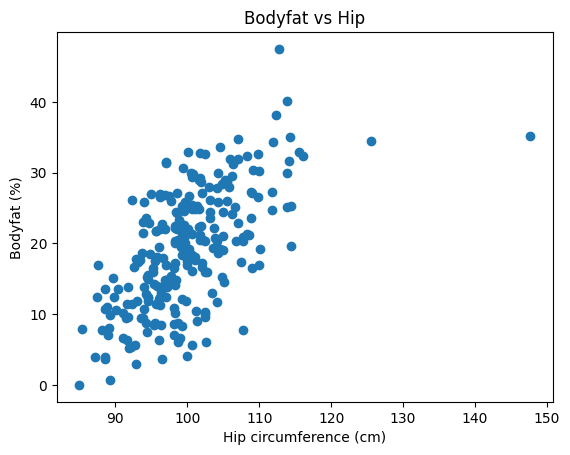

In [13]:
plt.scatter(df["Hip"], df["target"])
plt.xlabel("Hip circumference (cm)")
plt.ylabel("Bodyfat (%)")
plt.title("Bodyfat vs Hip")
plt.show()

Hip circumference shows a moderate positive trend with bodyfat. The points are more spread out than in the abdomen plot, but the relationship remains clear. This suggests hip measurements contribute useful information but are not as dominant as abdomen size.


### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

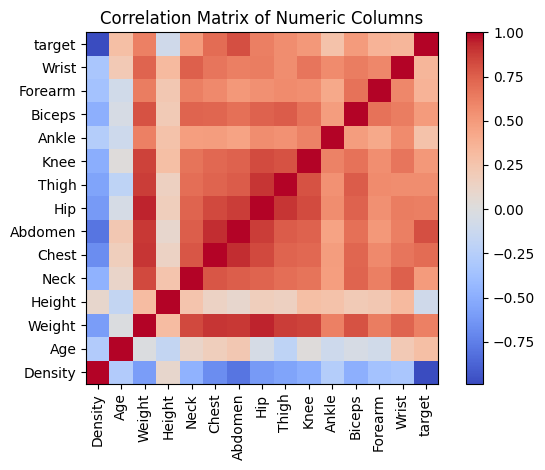

In [27]:
corr = df.corr()

plt.figure()
im = plt.imshow(corr, origin='lower', cmap='coolwarm')
plt.colorbar(im)

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Matrix of Numeric Columns")
plt.tight_layout()
plt.show()

In [16]:
corr_no_diag = corr.where(~np.eye(corr.shape[0], dtype=bool))

max_pair = corr_no_diag.unstack().idxmax()
max_value = corr_no_diag.unstack().max()

print(max_pair)
print(max_value)

('Weight', 'Hip')
0.9408841225678031


### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

### Linear Regression
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- https://en.wikipedia.org/wiki/Linear_regression

### Random Forest Regression
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- https://en.wikipedia.org/wiki/Random_forest

### Support Vector Regression
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
- https://en.wikipedia.org/wiki/Support_vector_machine

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [29]:
x = df.drop(columns=["target"]).values
y = df["target"].values

# Linear Regression
model1 = sklearn.linear_model.LinearRegression()
model1.fit(x, y)
pred1 = model1.predict(x)

# Random Forest Regression
model2 = sklearn.ensemble.RandomForestRegressor(n_estimators=200, random_state=0)
model2.fit(x, y)
pred2 = model2.predict(x)

# Support Vector Regression
model3 = sklearn.svm.SVR(C=10, gamma='scale', kernel='rbf')
model3.fit(x, y)
pred3 = model3.predict(x)

In [30]:
def L1(y, p):
    return np.mean(np.abs(y - p))

def L2(y, p):
    return np.mean((y - p)**2)

print("Linear Regression:")
print("L1:", L1(y, pred1))
print("L2:", L2(y, pred1))

print("\nRandom Forest Regression:")
print("L1:", L1(y, pred2))
print("L2:", L2(y, pred2))

print("\nSupport Vector Regression:")
print("L1:", L1(y, pred3))
print("L2:", L2(y, pred3))


Linear Regression:
L1: 0.48019622407529433
L2: 1.5272041202364655

Random Forest Regression:
L1: 0.13739088119968534
L2: 0.22913914468056945

Support Vector Regression:
L1: 4.037098989833829
L2: 24.96200223904622


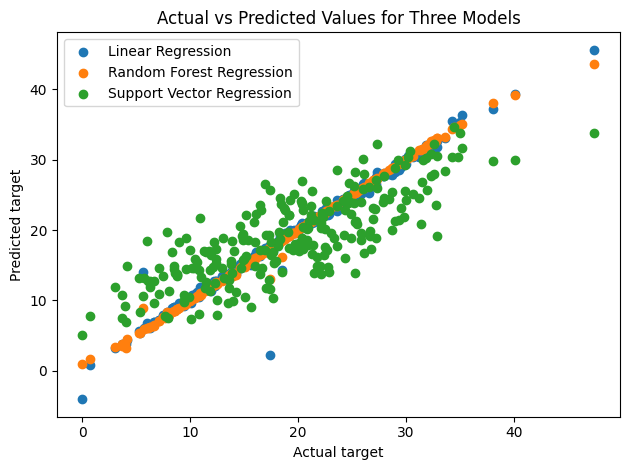

In [ ]:
plt.figure()
plt.scatter(y, pred1, label="Linear Regression")
plt.scatter(y, pred2, label="Random Forest Regression")
plt.scatter(y, pred3, label="Support Vector Regression")
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Actual vs Predicted Values for Three Models")
plt.legend()
plt.tight_layout()
plt.show()

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [ ]:
kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=0)

cv_L2_1 = -np.mean(sklearn.model_selection.cross_val_score(model1, x, y, cv=kf,
                                   scoring="neg_mean_squared_error"))

cv_L2_2 = -np.mean(sklearn.model_selection.cross_val_score(model2, x, y, cv=kf,
                                   scoring="neg_mean_squared_error"))

cv_L2_3 = -np.mean(sklearn.model_selection.cross_val_score(model3, x, y, cv=kf,
                                   scoring="neg_mean_squared_error"))

print("\n5-Fold Cross-Validation L2 losses:")
print("Linear Regression:", cv_L2_1)
print("Random Forest Regression:", cv_L2_2)
print("Support Vector Regression:", cv_L2_3)


5-Fold Cross-Validation L2 losses:
Linear Regression: 1.997461996735452
Random Forest: 2.6902196483296246
SVR: 27.179845367110737


### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [28]:
pipe_lr = sklearn.pipeline.Pipeline([
    ("scaler", sklearn.preprocessing.StandardScaler()),
    ("model", sklearn.linear_model.LinearRegression())
])

pipe_rf = sklearn.pipeline.Pipeline([
    ("scaler", sklearn.preprocessing.StandardScaler()),
    ("model", sklearn.ensemble.RandomForestRegressor(n_estimators=200, random_state=0))
])

pipe_svr = sklearn.pipeline.Pipeline([
    ("scaler", sklearn.preprocessing.StandardScaler()),
    ("model", sklearn.svm.SVR(kernel="rbf", C=10))
])

# Linear Regression
pipe_lr.fit(x, y)
pred_lr = pipe_lr.predict(x)
L2_lr_scaled = L2(y, pred_lr)

# Random Forest Regression
pipe_rf.fit(x, y)
pred_rf = pipe_rf.predict(x)
L2_rf_scaled = L2(y, pred_rf)

# SVR
pipe_svr.fit(x, y)
pred_svr = pipe_svr.predict(x)
L2_svr_scaled = L2(y, pred_svr)

print("L2 losses with standardized inputs:")
print("Linear Regression:", L2_lr_scaled)
print("Random Forest Regression:", L2_rf_scaled)
print("Support Vector Regression:", L2_svr_scaled)


L2 losses with standardized inputs:
Linear Regression: 1.5272041202364754
Random Forest Regression: 0.22914311406397728
Support Vector Regression: 0.7466025224822566


After standardizing the input columns, only the Support Vector Regression model changed its performance compared to problem 6. Linear Regression and Random Forest Regression produced L2 losses that were identical to their unscaled versions, because these models are not sensitive to rescaling of the input features. In contrast, the Support Vector Regression model improved dramatically, with its L2 loss dropping from 24.96 to 0.7466.

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

Trying 1000 random-depth decision trees is not useful, because cross validation will not turn unstable, overfitting models into good ones.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

The best model was the Random Forest Regression model on standardized inputs, chosen because it had the lowest cross-validated L2 loss of all models tested. I used cross-validation as the main criterion to avoid being misled by overfitting, which was especially visible in the training losses of several models. Linear Regression performed worse because the bodyfat data is not purely linear, and although the Support Vector Regression model improved with scaling, it still did not match the Random Forest. Since bodyfat depends on nonlinear relationships among measurements, the Random Forest’s ability to capture nonlinear interactions makes it the most appropriate model for this dataset.